<a href="https://colab.research.google.com/github/TristanMons/Ma-512---Final-Project/blob/main/ClimateTextClassification_Legrand_Monsellier_Vinatier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate change Text Classification

In [1]:
import pandas as pd
import json
import urllib.request # Import the urllib.request module

# URL of the JSONL file
url = "https://www.sustainablefinance.uzh.ch/dam/jcr:df02e448-baa1-4db8-921a-58507be4838e/climate-fever-dataset-r1.jsonl"

# Function to read the JSONL file line by line
def read_jsonl_from_url(url):
    data = []
    with urllib.request.urlopen(url) as response:
        for line in response:
            data.append(json.loads(line.decode('utf-8')))
    return data

# Load the data into a pandas DataFrame
df = pd.DataFrame(read_jsonl_from_url(url))

In [ ]:
# Display the DataFrame
df.head()

,claim_id,claim,claim_label,evidences
0,0,Global warming is driving polar bears toward e...,SUPPORTS,[{'evidence_id': 'Extinction risk from global ...
1,5,The sun has gone into ‘lockdown’ which could c...,SUPPORTS,"[{'evidence_id': 'Famine:386', 'evidence_label..."
2,6,The polar bear population has been growing.,REFUTES,"[{'evidence_id': 'Polar bear:1332', 'evidence_..."
3,9,Ironic' study finds more CO2 has slightly cool...,REFUTES,"[{'evidence_id': 'Atmosphere of Mars:131', 'ev..."
4,10,Human additions of CO2 are in the margin of er...,REFUTES,[{'evidence_id': 'Carbon dioxide in Earth's at...


In [ ]:
print(df.describe())

       claim_id                                              claim  \
count      1535                                               1535   
unique     1535                                               1535   
top           0  Global warming is driving polar bears toward e...   
freq          1                                                  1   

       claim_label                                          evidences  
count         1535                                               1535  
unique           4                                               1534  
top       SUPPORTS  [{'evidence_id': 'Greenland ice sheet:43', 'ev...  
freq           654                                                  2  


In [ ]:
print(df.shape)

(1535, 4)


In [ ]:
df.value_counts("claim_label")

,count
claim_label,
SUPPORTS,654
NOT_ENOUGH_INFO,474
REFUTES,253
DISPUTED,154


#Start your project here.

In [ ]:
df.isnull().count()

,0
claim_id,1535
claim,1535
claim_label,1535
evidences,1535


In [2]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

<Axes: xlabel='claim_label', ylabel='Count'>

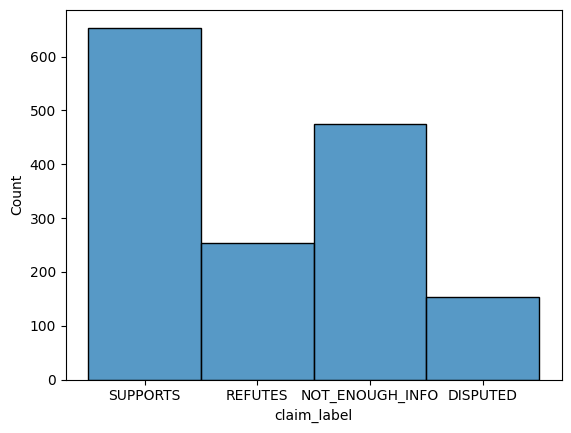

In [ ]:
sns.histplot(df["claim_label"])

In [3]:
df = pd.DataFrame(read_jsonl_from_url(url))

## Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt


##Preprocessing

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['claim_stopword'] = df['claim'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
le = LabelEncoder()
df["encoded_label"] = le.fit_transform(df["claim_label"])
num_classes = len(le.classes_)

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["claim_stopword"]).toarray()
y = to_categorical(df["encoded_label"], num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##1st model

In [ ]:
model_1 = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model_1.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##First model evaluation

In [ ]:
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3673 - loss: 0.1809 - val_accuracy: 0.4365 - val_loss: 0.1680
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4083 - loss: 0.1661 - val_accuracy: 0.4397 - val_loss: 0.1655
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5501 - loss: 0.1366 - val_accuracy: 0.4853 - val_loss: 0.1680
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7764 - loss: 0.0795 - val_accuracy: 0.4853 - val_loss: 0.1746
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8811 - loss: 0.0406 - val_accuracy: 0.4625 - val_loss: 0.1836
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9685 - loss: 0.0233 - val_accuracy: 0.4463 - val_loss: 0.1937
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.0122 - val_accuracy: 0.4430 - val_loss: 0.1992
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9870 - loss: 0.0073 - val_accuracy: 0.4463 - val_loss

##Plot results

In [8]:
def plot_model(history):
  train_loss  = history.history['loss']
  val_loss    = history.history['val_loss']

  train_accuracy  = history.history['accuracy']
  val_accuracy    = history.history['val_accuracy']

  epochs = range(1, len(train_loss) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_loss, label='Train')
  plt.plot(epochs, val_loss, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss Plot')
  plt.legend()
  plt.grid()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_accuracy, label='Train')
  plt.plot(epochs, val_accuracy, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Plot')
  plt.legend()
  plt.grid()

  plt.tight_layout()
  plt.show()

In [7]:

plot_model(history_1)



NameError: name 'history_1' is not defined

##2nd model

In [ ]:
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Conv1D, Reshape, GlobalMaxPooling1D, Flatten

In [ ]:
input_dim = X_train.shape[0]

model_2 = Sequential([
      Conv1D(128, kernel_size=5, kernel_regularizer=L2(1e-12), padding="same", activation='relu', input_shape=(input_dim, 1), name="layer1"),

      Conv1D(128*2, kernel_size=5, kernel_regularizer=L2(1e-12), padding="same", activation='relu', name="layer2"),
      GlobalMaxPooling1D(),

      Flatten(),
      Dropout(0.5),
      Dense(10, activation='relu'),
      Dropout(0.5),
      Dense(num_classes, activation='softmax')

      ])

model_2.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 483ms/step - accuracy: 0.3022 - loss: 0.1826 - val_accuracy: 0.4365 - val_loss: 0.1702
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.4114 - loss: 0.1767 - val_accuracy: 0.4365 - val_loss: 0.1707
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.4026 - loss: 0.1746 - val_accuracy: 0.4365 - val_loss: 0.1704
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.3966 - loss: 0.1773 - val_accuracy: 0.4365 - val_loss: 0.1710
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.3827 - loss: 0.1747 - val_accuracy: 0.4365 - val_loss: 0.1713
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.4019 - loss: 0.1758 - val_accuracy: 0.4365 - val_loss: 0.1701
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.4484 - loss: 0.1726 - val_accuracy: 0.4365 - val_loss: 0.1702
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.4138 - loss: 0.1760 - val_accuracy: 0

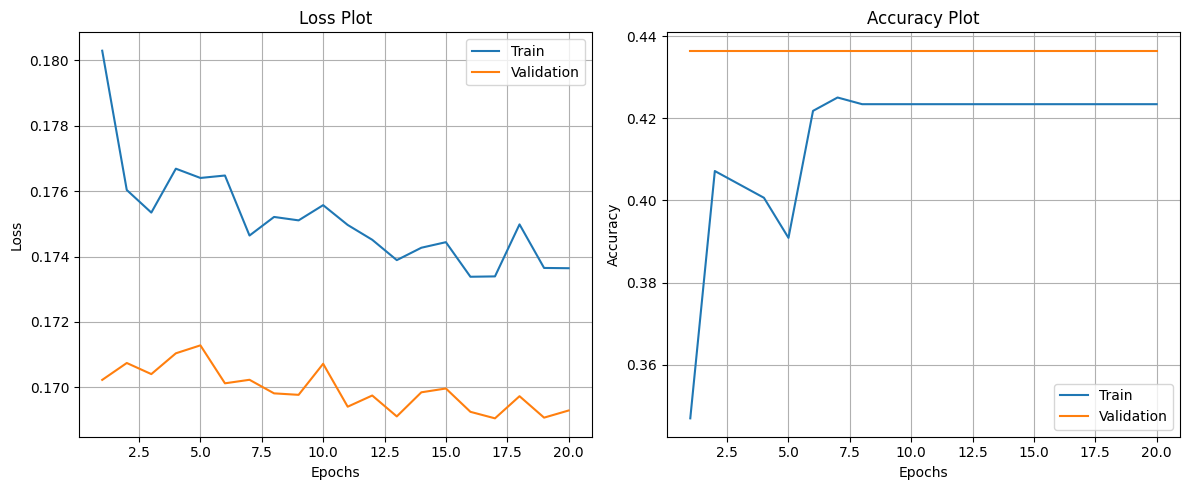

In [ ]:
plot_model(history_2)

##Model 3

In [ ]:
from tensorflow.keras.layers import MaxPool1D, BatchNormalization

In [ ]:
model_3 = Sequential([
    #Conv1D(256, kernel_size=7, kernel_regularizer=L2(1e-12), padding="same", activation='relu', input_shape=(input_dim, 1), name="layer1"),
    Conv1D(input_dim, kernel_size=7, padding="same", activation='relu', input_shape=(input_dim, 1), name="layer1"),
    BatchNormalization(),

    GlobalMaxPooling1D(),
    #Flatten(),

    Dense(256, activation="relu", kernel_regularizer=L2(1e-12), name="layer2"),
    Dropout(0.7),
    Dense(128, activation="relu", kernel_regularizer=L2(1e-12), name="layer3"),
    BatchNormalization(),
    Dropout(0.7),
    Dense(num_classes, activation="softmax")
])

model_3.compile(optimizer="adam", loss="mae", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_3 = model_3.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 424ms/step - accuracy: 0.2752 - loss: 0.3674 - val_accuracy: 0.4365 - val_loss: 0.3553
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.2641 - loss: 0.3664 - val_accuracy: 0.4365 - val_loss: 0.3170
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.2695 - loss: 0.3628 - val_accuracy: 0.4365 - val_loss: 0.2957
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.2980 - loss: 0.3532 - val_accuracy: 0.4365 - val_loss: 0.2876
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3100 - loss: 0.3488 - val_accuracy: 0.4365 - val_loss: 0.2842
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3375 - loss: 0.3406 - val_accuracy: 0.4365 - val_loss: 0.2829
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.3347 - loss: 0.3414 - val_accuracy: 0.4365 - val_loss: 0.2823
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.3316 - loss: 0.3399 - val_accuracy: 0.4365 - 

In [ ]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Conv1D)                      │ (None, 1228, 1228)          │           9,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1228, 1228)          │           4,912 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_4               │ (None, 1228)                │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 256)                 │         314,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,084,430 (4.14 MB)

 Trainable params: 360,572 (1.38 MB)

 Non-trainable params: 2,712 (10.59 KB)

 Optimizer params: 721,146 (2.75 MB)

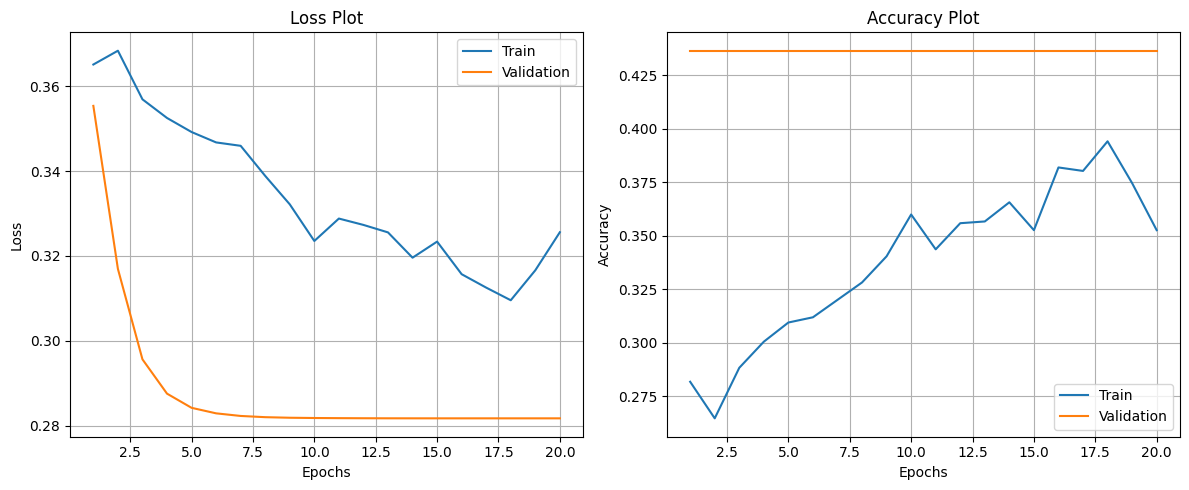

In [ ]:
plot_model(history_3)

## Model using Recursive Neural Networl (RNN)

In [10]:
from tensorflow.keras.layers import SimpleRNN

In [12]:
modelRNN_1 = Sequential([

    SimpleRNN(64, input_shape=(X_train.shape[0], 1), activation='relu', name="layer1"),
    Dropout(0.5),

    Dense(32, activation='relu', name="layer2"),
    Dense(num_classes, activation='softmax')
])

modelRNN_1.compile(optimizer="adam", loss="mae", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
history_RNN1 = modelRNN_1.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 599ms/step - accuracy: 0.3180 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 624ms/step - accuracy: 0.4390 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - accuracy: 0.4175 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 461ms/step - accuracy: 0.4104 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 461ms/step - accuracy: 0.4186 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 427ms/step - accuracy: 0.4384 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 428ms/step - accuracy: 0.4476 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - accuracy: 0.4231 - loss: nan - val_accuracy: 0.4365 - val_loss: nan
Epoch 9/20
20/20

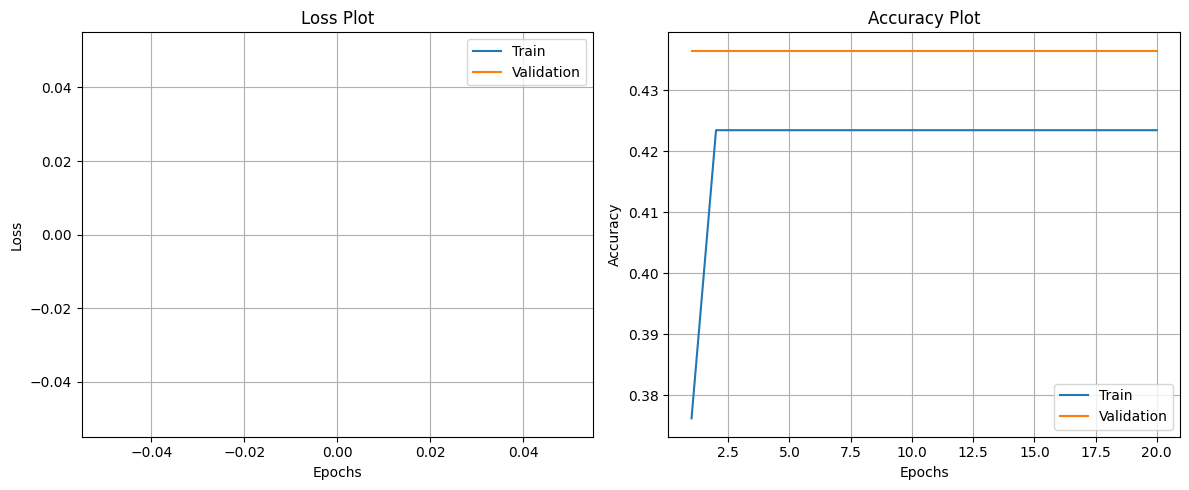

In [14]:
plot_model(history_RNN1)

In [15]:
from tensorflow.keras.layers import LSTM

In [17]:
model_RNN2 = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[0],1)),
    LSTM(32),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_RNN2.compile(optimizer="adam", loss="mae", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model_RNN2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 290ms/step - accuracy: 0.3333 - loss: 0.3729 - val_accuracy: 0.4365 - val_loss: 0.3316
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.4318 - loss: 0.3187 - val_accuracy: 0.4365 - val_loss: 0.2841
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.4089 - loss: 0.2977 - val_accuracy: 0.4365 - val_loss: 0.2821
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.4143 - loss: 0.2938 - val_accuracy: 0.4365 - val_loss: 0.2819
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.4408 - loss: 0.2801 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.4246 - loss: 0.2882 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - accuracy: 0.4213 - loss: 0.2896 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.4035 - loss: 0.2984 - val_accura

In [20]:
from tensorflow.keras.layers import Embedding

In [26]:

vocab_size = len(tfidf.vocabulary_)
embedding_dim = 100

model_RNN3 = Sequential([
    Embedding(input_dim=(None, vocab_size), output_dim=embedding_dim),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_RNN3.compile(optimizer="adam", loss="mae", metrics=["accuracy"])

In [27]:
model_RNN2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 386ms/step - accuracy: 0.4165 - loss: 0.2918 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.4097 - loss: 0.2952 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - accuracy: 0.4163 - loss: 0.2919 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.4274 - loss: 0.2863 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.4202 - loss: 0.2900 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 273ms/step - accuracy: 0.4301 - loss: 0.2849 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - accuracy: 0.4302 - loss: 0.2850 - val_accuracy: 0.4365 - val_loss: 0.2818
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.4232 - loss: 0.2885 - val_accuracy: 

### Example pretrained model

-> https://huggingface.co/Sushovan/autotrain-test-text-classification-3175589570

In [ ]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")
tokenized_data = tokenizer(df["claim"][0], return_tensors="np", padding=True)
# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data = dict(tokenized_data)

labels = np.array(df["claim_label"])

In [ ]:
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Load and compile our model
model = TFAutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-cased")
# Lower learning rates are often better for  fine-tuning transformers
model.compile(optimizer=Adam(3e-5))  # No loss argument!

model.fit(tokenized_data, labels)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

2024-11-05 12:14:14.263644: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89075712 exceeds 10% of free system memory.
2024-11-05 12:14:15.200124: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89075712 exceeds 10% of free system memory.
2024-11-05 12:14:15.423173: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89075712 exceeds 10% of free system memory.
2024-11-05 12:14:23.832738: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89075712 exceeds 10% of free system memory.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7f4c78cd7e20>

In [ ]:

under_sampler = RandomUnderSampler(random_state=42)
X_dist, y_dist = under_sampler.fit_resample(np.array(y), np.array(y))

# df_dist = pd.DataFrame({df.columns[0] : X_dist, df.columns[1] : y_dist})
# df_dist.head()

#Comments on the previous section.
This model overfits the training set and performs poorly on the validation set.